最終更新日：2023/01/15
# 二値分類における評価指標（正例か負例かを予測値とする場合）

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
        confusion_matrix, 
        accuracy_score, 
        precision_score, 
        recall_score,
        f1_score,
        fbeta_score,
        matthews_corrcoef,
        log_loss,
        roc_auc_score)

## 混合行列
- TP(True Positive): 予測値が正例で、それが正しい場合
- TN(True Negative): 予測値が負例で、それが正しい場合
- FP(False Positive): 予測値が正例で、それが誤りの場合
- FN(False Negative): 予測値が負例で、それが誤りの場合

In [14]:
# {0, 1}で表される二値分類の真値と予測値
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0])
y_pred = np.array([0, 0, 1, 1, 0, 0, 1, 1])

# confusion_matrixの作成
tp = np.sum((y_pred == 1) & (y_true == 1))
tn = np.sum((y_pred == 0) & (y_true == 0))
fp = np.sum((y_pred == 1) & (y_true == 0))
fn = np.sum((y_pred == 0) & (y_true == 1))

confusion_matrix_1 = np.array([
    [tp, fp],
    [fn, tn]
    ])

print('confusion_matrix:\n [[tp, fp],\n [fn, tn]]')
print(f'confusion_matrix:\n {confusion_matrix_1}')

# sklearnは並びが異なる({0,1}の順)
confusion_matrix_2 = confusion_matrix(y_true, y_pred)
print('confusion_matrix(sklearn):\n [[tn, fp],\n [fn, tp]]')
print(f'confusion_matrix:\n {confusion_matrix_2}')

confusion_matrix:
 [[tp, fp],
 [fn, tn]]
confusion_matrix:
 [[3 1]
 [2 2]]
confusion_matrix(sklearn):
 [[tn, fp],
 [fn, tp]]
confusion_matrix:
 [[2 1]
 [2 3]]


### accuracy
$$
    \textrm{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$
### error rate
$$
    \textrm{error rate} = 1 - \text{accuracy}
$$

In [18]:
accuracy_1 = (tp + tn)/(tp + tn + fp + fn)

# scikit-learnのモジュールで計算
accuracy = accuracy_score(y_true, y_pred)
print(f'calcu result: {accuracy_1:.3f}, scikit result: {accuracy:.3f}')

calcu result: 0.625, scikit result: 0.625


### precision
- 予測が正例のうち、正しく予測した割合
- 誤検知を少なくしたい場合に重視する
$$
    \textrm{precision} = \frac{TP}{TP + FP}
$$

### recall
- 真値が正例のうち、正しく正例を予測した割合
- 正例の見逃しを避けたい場合に使用
$$
    \textrm{recall} = \frac{TP}{TP + FN}
$$

In [20]:
precision_1 = tp / (tp + fp)
precision = precision_score(y_true, y_pred)

recall_1 = tp / (tp + fn)
recall = recall_score(y_true, y_pred)

print(f'calcu precision: {precision_1:.3f}, scikit result: {precision:.3f}')
print(f'calcu recall: {recall_1:.3f}, scikit result: {recall:.3f}')

calcu precision: 0.750, scikit result: 0.750
calcu recall: 0.600, scikit result: 0.600


### F1-score
- precisionとrecallの調和平均
- precisionとrecallのバランスをとった指標
$$
    \textrm{F}_1 = \frac{2}{\frac{1}{\textrm{recall}} + \frac{1}{\textrm{precision}}}
$$

### $\textrm{F}_{\beta}$-score
- $F_1$-scoreのrecallに重み$\beta$を加えた指標
$$
    \textrm{F}_{\beta} = \frac{(1 + \beta)^2}{\frac{\beta^2}{\textrm{recall}} + \frac{1}{\textrm{precision}}}
$$

In [23]:
f1_1 = 2 / (1/recall_1 + 1/precision_1)
f1 = f1_score(y_true, y_pred)

beta = 0.5
fbeta_1 = (1 + beta**2) / (beta**2/recall_1 + 1/precision)
fbeta = fbeta_score(y_true, y_pred, beta=beta)

print(f'calc f1: {f1_1:.3f}, scikit f1: {f1:.3f}')
print(f'calc f1: {fbeta_1:.3f}, scikit f1: {fbeta:.3f}')

calc f1: 0.667, scikit f1: 0.667
calc f1: 0.714, scikit f1: 0.714


### MCC
- 不均衡なデータに対しても適切に評価しやすい指標
$$
    \textrm{MCC} = \frac{TP \times TN - FP \times FN}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}
$$

In [27]:
mcc_1 = (tp * tn - fp * fn)/np.sqrt( (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) )
mcc = matthews_corrcoef(y_true, y_pred)

print(f'calcu mcc: {mcc_1:.3f}, scikit mcc: {mcc:.3f}')

calcu mcc: 0.258, scikit mcc: 0.258


# 二値分類における評価指標（正例である確率を予測値とする場合）

### logloss
- 分類タスクで体表的な指標
- cross entropyとも呼ばれる
$$
    \textrm{logloss} = -\frac{1}{N} \sum_{i=1}^N (y_i \log p_i + (1 - y_i) \log (1 - p_i))
$$

In [57]:
# {0, 1}の二値分類の真値と予測確率(1である確率)
y_true = np.array([1, 0, 1, 1, 0, 1])
y_pred = np.array([0.1, 0.2, 0.8, 0.8, 0.1, 0.3])

logloss_1 = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
logloss = log_loss(y_true, y_pred)

print(f'calcu logloss: {logloss_1:.3f}, scikit logloss: {logloss:.3f}')

calcu logloss: 0.714, scikit logloss: 0.714


### AUC
- ROC曲線の下部の面積
    - ROC曲線：予測値を正例とする閾値を1から0に変化させたときの偽陽性率と真陽性率のプロット

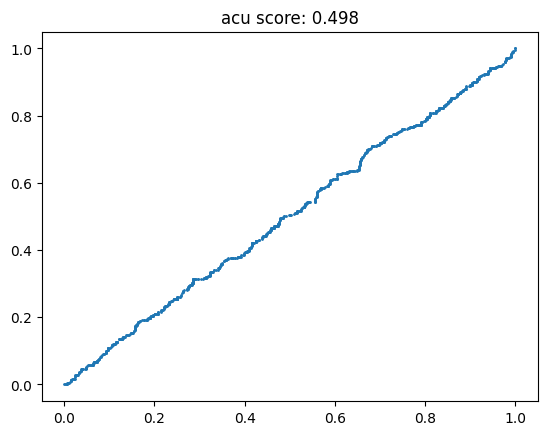

In [78]:
# ROC Curve
# ランダムだとほぼ対角線
thres_list = np.linspace(0.0, 1.0, 1000)[::-1]

y_true = np.random.choice([0, 1], 1000)
y_pred = np.random.uniform(0.0, 1.0, 1000)

fp_rates = []
tp_rates = []
for thres in thres_list:
    cfmat = confusion_matrix(y_true, y_pred < thres)
    tn = cfmat[0,0]
    fp = cfmat[0,1]
    fn = cfmat[1,0]
    tp = cfmat[1,1]
    fp_rate = fp/(fp + tn)
    tp_rate = tp/(tp + fn)

    fp_rates.append(fp_rate)
    tp_rates.append(tp_rate)

auc = roc_auc_score(y_true, y_pred)
plt.scatter(fp_rates, tp_rates, s=1)
plt.title(f'acu score: {auc:.3f}')
plt.show()